In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# always useful
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats
import math




In [3]:
import numpy.random as npr
npr.seed(2407) 

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


<ipython-input-4-45a30d1b1258>:20: RuntimeWarning: divide by zero encountered in reciprocal
  error = np.sqrt(bins[0])**(-1)


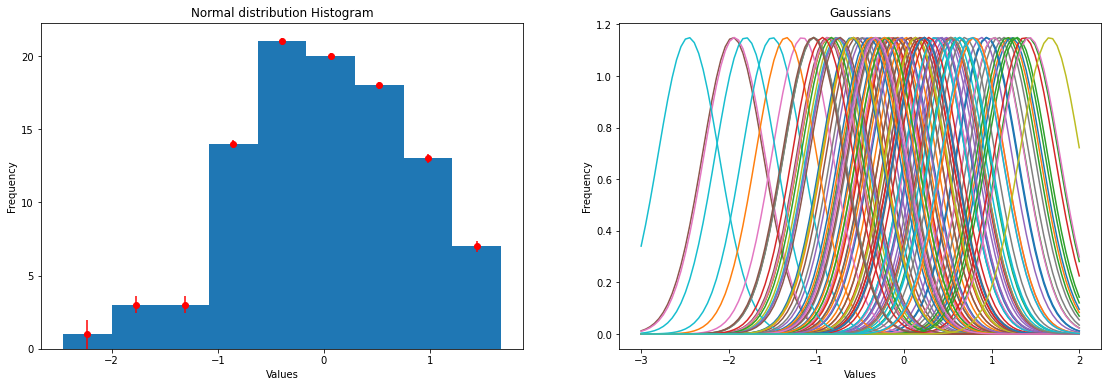

In [4]:
N = 100

x = np.random.randn(N)

figura, axes = plt.subplots(1, 2)

figura.set_size_inches(19, 6)
axes[0].set_title("Normal distribution Histogram")
axes[0].set_ylabel("Frequency")
axes[0].set_xlabel('Values')

axes[1].set_title("Gaussians")
axes[1].set_ylabel("Frequency")
axes[1].set_xlabel('Values')


bins = axes[0].hist(x, bins="auto")
axes[0].locator_params(integer = True);

error = np.sqrt(bins[0])**(-1)
loc_error = (bins[1][:-1] + bins[1][1:])/2
axes[0].errorbar(loc_error, bins[0], yerr=error, fmt="o", color="red")



std = 1.06*x.std()*x.size**(-0.2)
points = np.linspace(math.floor(np.min(x)), math.ceil(np.max(x)), N)  
#print(points)
gaussians = np.zeros((len(points),0))

for i in range(N):
    distribution = stats.norm.pdf(points, loc=x[i], scale=std).reshape(N,1) 
    gaussians = np.concatenate([gaussians, distribution], axis = 1)
    axes[1].plot(points, distribution)
    
    

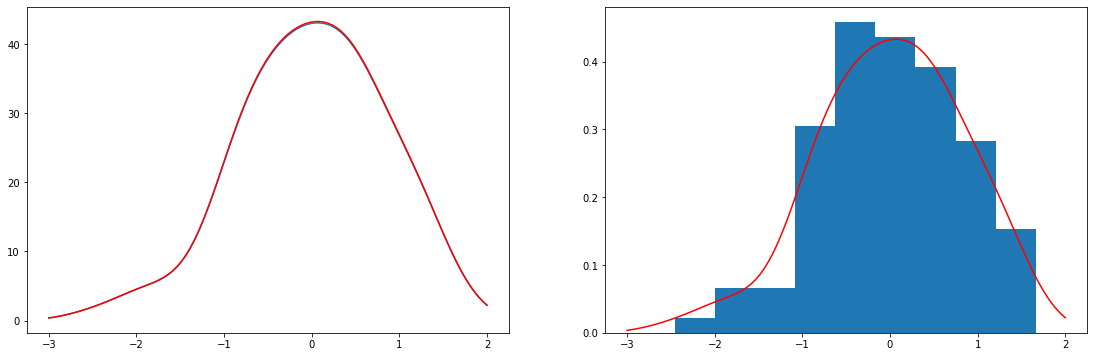

In [5]:
fig, axes2 = plt.subplots(1, 2)
gauss_sum = np.sum(gaussians, axis = 1)
integral_g = sp.integrate.trapz(gauss_sum, points)
norm_sum = gauss_sum /integral_g


fig.set_size_inches(19, 6)
axes2[0].plot(points, gauss_sum)
axes2[0].plot(points, norm_sum*100, color="r")
axes2[1].plot(points, norm_sum, color="r")
axes2[1].hist(x, bins="auto",density = True);




2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

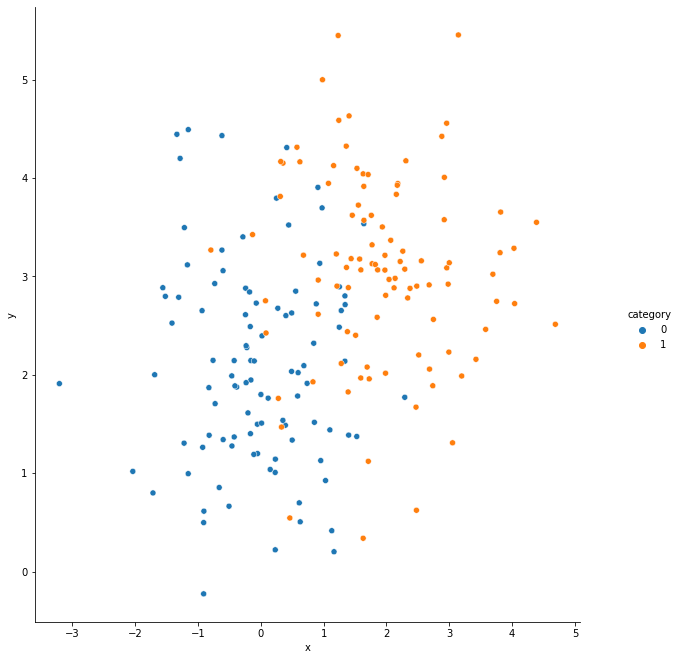

In [6]:
cat = 2
size = 100

medias =  np.random.randint(cat*4,size=(cat, 2))
#print(medias)

df = [] 
for i in range(cat):
    x, y = np.random.multivariate_normal(medias[i], [[1,0], [0,1]], size).T
    c = [i for j in range(size)]
    df.append(pd.DataFrame({"x" : x,"y" : y,"category" : c }))


result =  pd.concat(df, ignore_index=True, verify_integrity=True)


a = sns.relplot(x="x", y="y", hue="category", data=result);

a.fig.set_size_inches(10,10)

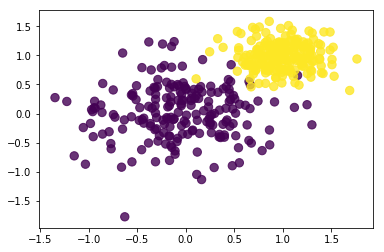

In [7]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

Objects cleaned:  642.0


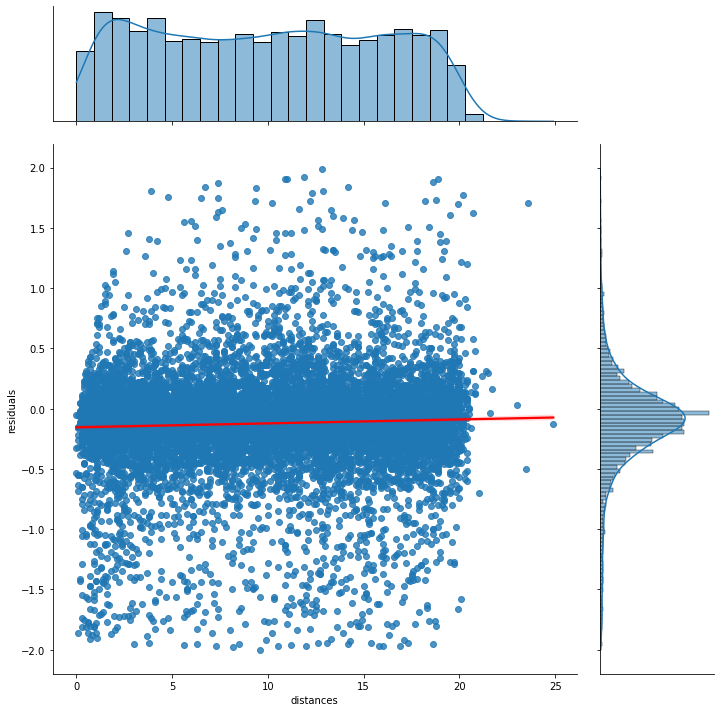

In [8]:
#wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

data = np.load('residuals_261.npy',allow_pickle=True).item()
df = pd.DataFrame(data)
#print(df.size/2)

df_clean = df[ abs(df['residuals']) < 2 ]
print("Objects cleaned: ", df.size/2 -df_clean.size/2 )
df = df_clean

#fig, ax = plt.subplots()

reg = sp.stats.linregress(df["residuals"],df["distances"])
sns.jointplot(data=df, x="distances", y="residuals", kind="reg", height=10, ratio=4, line_kws={"color": "r"});
sns.despine()






In [9]:
min_x = 0
max_x = 20

#distancias = df[ (abs(df['distances']) <= max_x) & (df['distances'] > 0) ] ["distances"]
distancias = df["distances"]
x, bins =np.histogram(distancias, bins = "auto")
#print(bins)
x1 = np.digitize(distancias, bins)
df["bin"] = x1
#print(bins)


y = []
erry = []
for i in range(len(bins)-2):
    y.append(np.mean(df[df['bin'] == i+1]["residuals"] ))
    erry.append(np.std(df[df['bin'] == i+1]["residuals"] ))
y.append(0)
y.insert(0,0)
erry.append(0)
erry.insert(0,0)
#print(bins,y,erry,x)


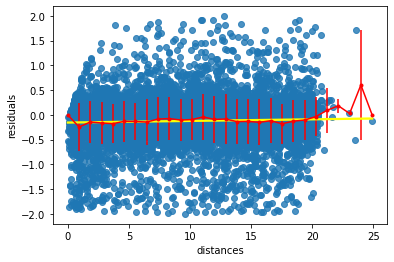

In [10]:
sns.regplot(data=df, x="distances", y="residuals", line_kws={"color": "yellow"})
plt.errorbar(x=bins, y=y , yerr=erry, marker = ".", color = "red");

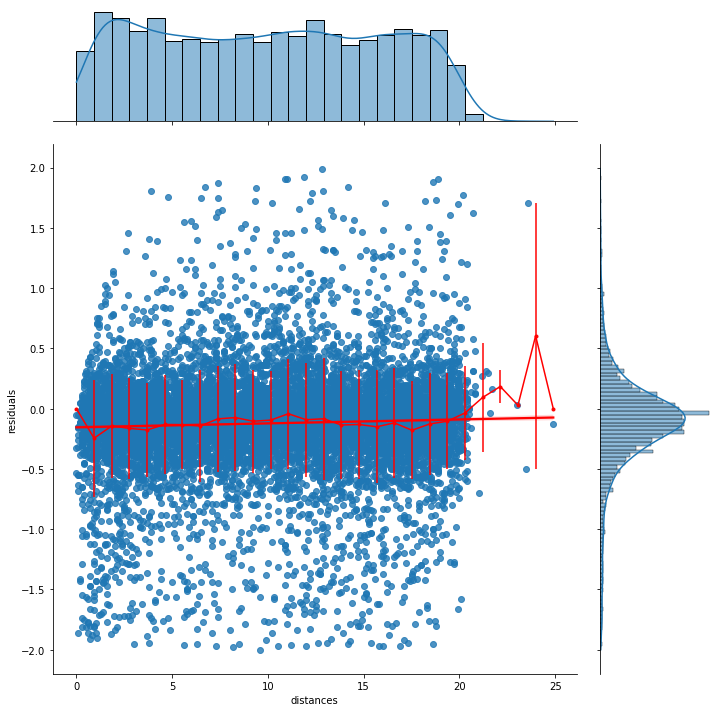

In [29]:
fig.set_size_inches(18.5, 10.5)
#%matplotlib inline
#plt.errorbar(x=bins, y=y , yerr=erry, marker = ".", color = "red");
u = sns.jointplot(data=df, x="distances", y="residuals", kind="reg", height=10, marker = "o", ratio=4, line_kws={"color": "r"});
u.ax_joint.errorbar(x=bins, y=y , yerr=erry, marker = ".", color = "red");